<center><h1>HosseinzadehKhaligh_Ehsan_HW6</h1></center>

Name: Ehsan Hosseinzadeh Khaligh
<br>
Github Username: ehsankhaligh
<br>
USC ID: 1112811250

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import pickle
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [2]:
import warnings
warnings.filterwarnings('ignore')

### (a) Download the APS Failure data

In [3]:
!ls ../data
train_df = pd.read_csv('../data/aps_failure_training_set.csv', comment='#')
test_df = pd.read_csv('../data/aps_failure_test_set.csv', comment='#')

aps_failure_description.txt  aps_failure_training_set.csv
aps_failure_test_set.csv


In [4]:
display(train_df.head())
display(train_df.shape)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


(60000, 171)

In [5]:
display(test_df.head())
display(test_df.shape)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


(16000, 171)

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

There are several techniques that can be used to handle missing data, and the choice of technique depends on the nature and characteristics of the data and the goals of the analysis. Here are some common techniques for dealing with missing values:
 
1. Deletion: This technique involves deleting any row or column with missing values.

2. Imputation: This technique involves replacing missing values with estimated or predicted values. i.e mean

3. Prediction modeling: This technique involves building a prediction model that includes the variable with missing values and other variables in the dataset. 

4. Expert knowledge: In some cases, expert knowledge or domain-specific information can be used to estimate missing values.


I decided to use man item #2

In [6]:
y_train = train_df['class'].tolist()
#print("y_train:", y_train)
x_train = train_df.drop('class', axis=1)

x_train_new = x_train.replace('na', np.nan)  # convert 'na' to NaN

imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit_transform(x_train_new)
x_train_new = pd.DataFrame(imputer)

display(x_train_new.head())
display(x_train_new.shape)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


(60000, 170)

In [7]:
y_test = test_df['class'].tolist()
#print("y_test:", y_test)
x_test = test_df.drop('class', axis=1)

x_test_new = x_test.replace('na', np.nan)  # convert 'na' to NaN

imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit_transform(x_test_new)
x_test_new = pd.DataFrame(imputer)

display(x_test_new.head())
display(x_test_new.shape)

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,60.0,0.000000,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


(16000, 170)

#### (ii) Calculate the coefficient of variation

A low CV indicates that the data points in the dataset are close to the mean and have low variability, while a high CV indicates that the data points are widely spread out from the mean and have high variability. The CV can be useful in fields such as finance, economics, and biology, where it is often used to evaluate the risk associated with an investment or to compare the variability of different sets of data.

In [8]:
s = x_train_new.std(axis=0, ddof=1)
m = x_train_new.mean(axis=0)
cv_train = s / m
print(cv_train)

0        2.450938
1        2.328400
2        2.169767
3      183.847620
4       23.190937
          ...    
165      4.962483
166      3.222010
167      5.626979
168     47.124953
169     40.553250
Length: 170, dtype: float64


In [9]:
s = x_test_new.std(axis=0, ddof=1)
m = x_test_new.mean(axis=0)
cv_test = s / m
print(cv_test)

0       7.405254
1       1.598753
2       2.159811
3       3.059255
4      17.984377
         ...    
165     4.593464
166     3.698411
167     6.188841
168    50.690401
169    57.661381
Length: 170, dtype: float64


#### (iii) Plot a correlation matrix

Positive correlation between two variables means that as one variable increases, the other variable also tends to increase. In other words, the two variables move in the same direction. For example, the height and weight of a person are positively correlated, as taller people tend to weigh more.

Negative correlation between two variables means that as one variable increases, the other variable tends to decrease. In other words, the two variables move in opposite directions. For example, the amount of exercise a person does and their body fat percentage are negatively correlated, as people who exercise more tend to have lower body fat percentages.

Correlation coefficients range from -1 to 1, where a value of -1 indicates a perfect negative correlation, a value of 1 indicates a perfect positive correlation, and a value of 0 indicates no correlation. The magnitude of the correlation coefficient indicates the strength of the correlation, with larger absolute values indicating stronger correlations.

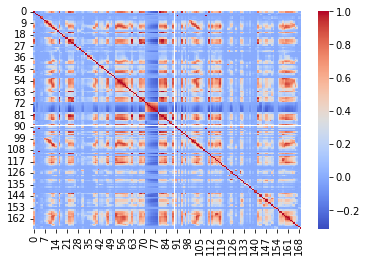

In [10]:
corr_matrix = x_train_new.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

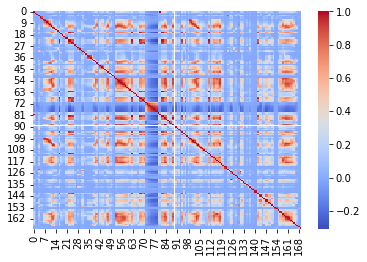

In [11]:
corr_matrix = x_test_new.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

#### (iv) Make scatter plots and box plots

In [12]:
top_features_train = cv_test.nlargest(int(np.sqrt(170))).index
display("features with highest CV train df:",top_features_train)

top_features_test = cv_train.nlargest(int(np.sqrt(170))).index
display("features with highest CV test df:", top_features_test)

'features with highest CV train df:'

Int64Index([122, 19, 29, 27, 134, 121, 51, 169, 93, 6, 138, 168, 153], dtype='int64')

'features with highest CV test df:'

Int64Index([122, 91, 109, 3, 136, 138, 6, 27, 41, 51, 19, 29, 93], dtype='int64')

Test Pair plot


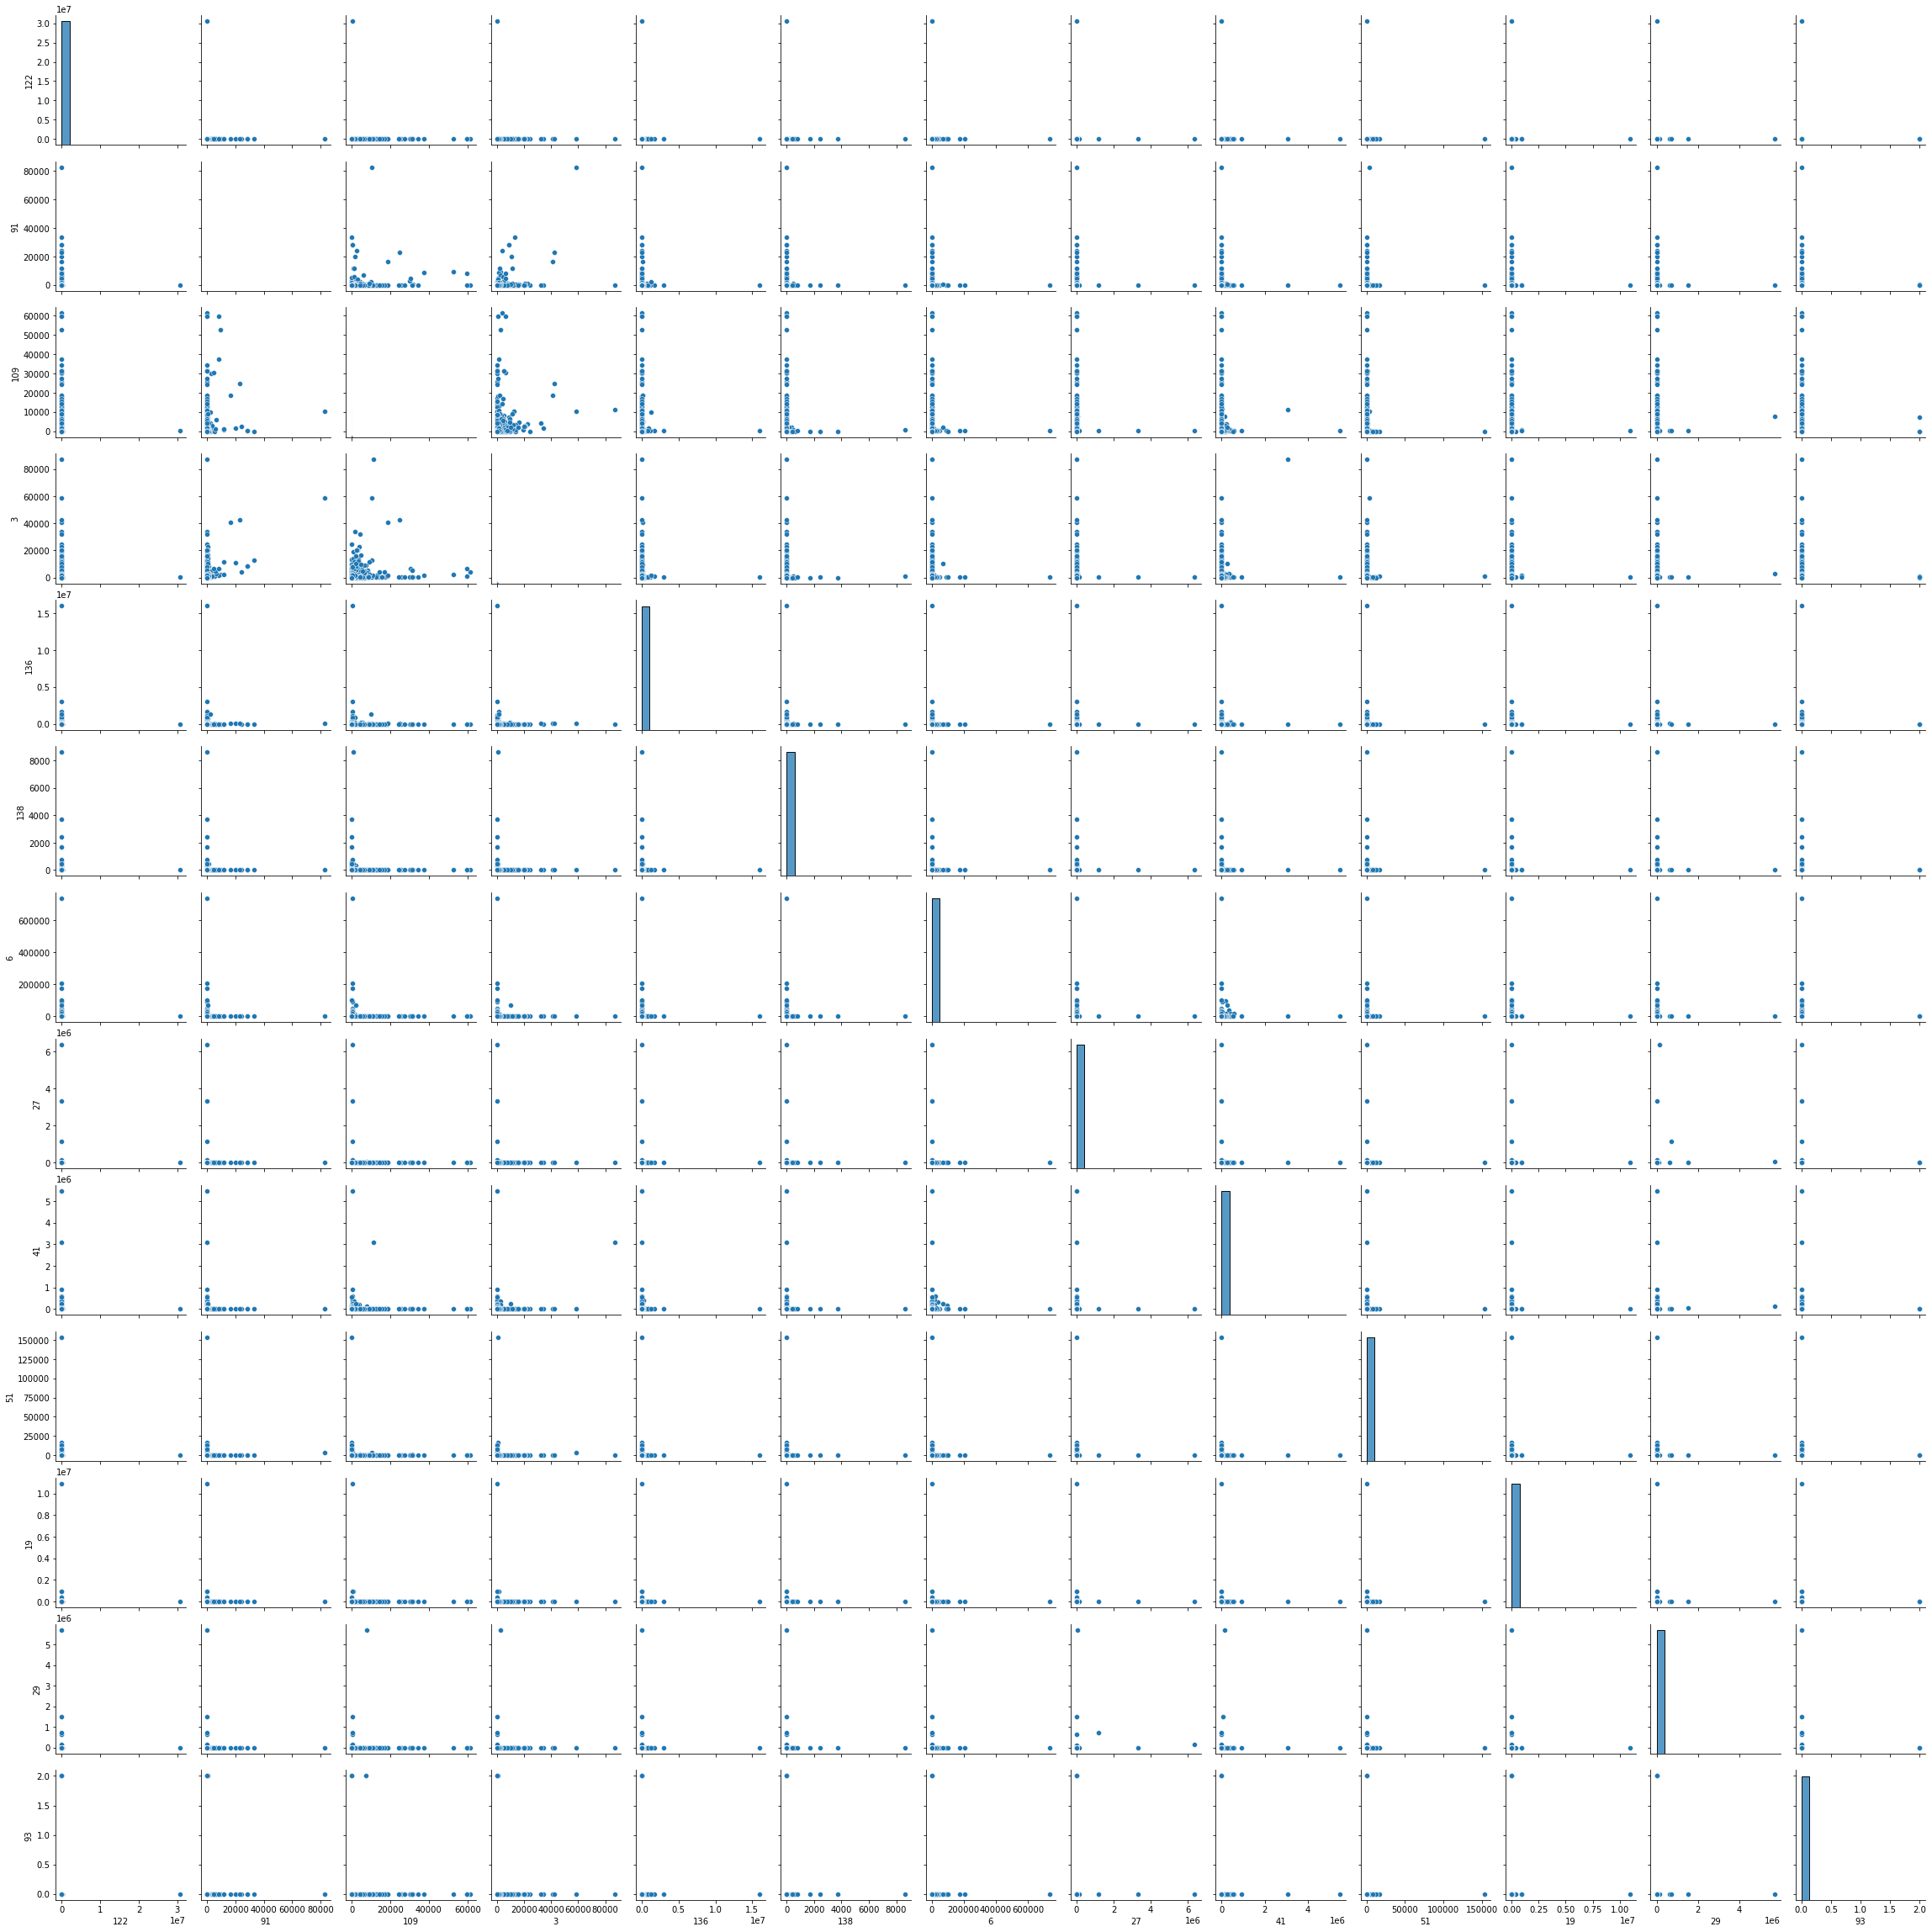

In [13]:
df_selected = x_test_new.iloc[:, top_features_test]
print("Test Pair plot")
sns.pairplot(df_selected)

Train Pair plot


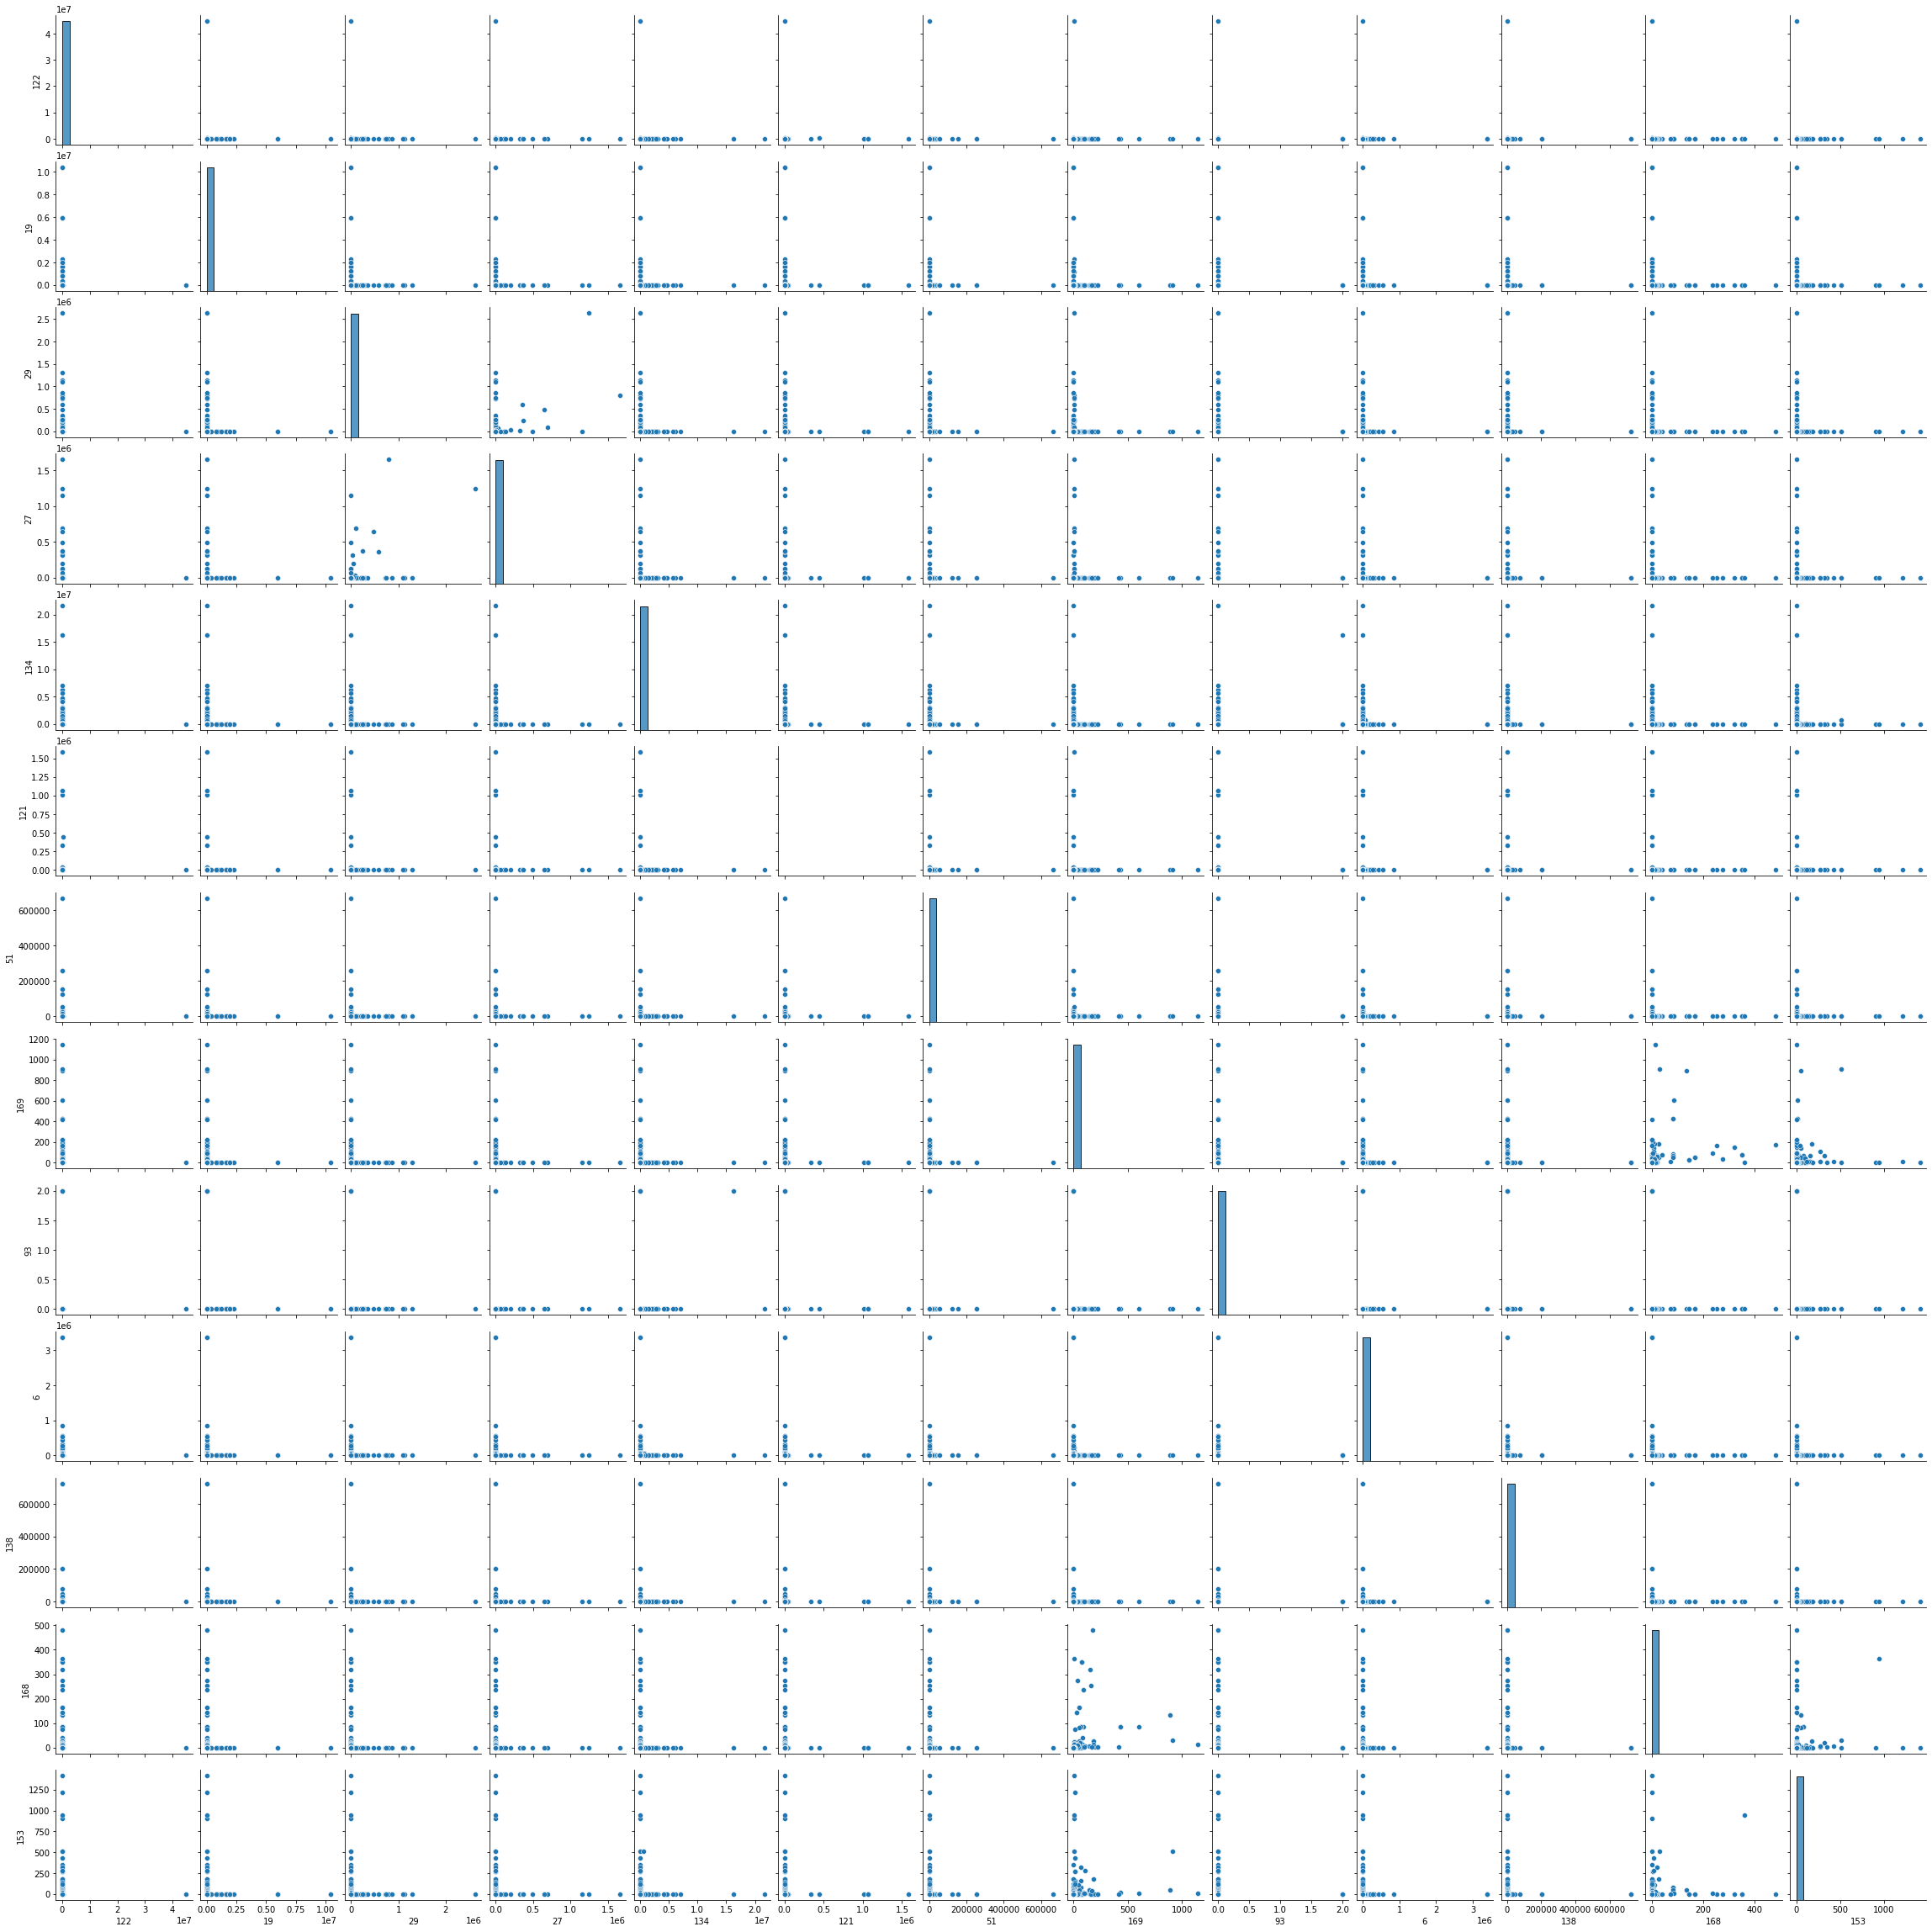

In [14]:
df_selected = x_train_new.iloc[:, top_features_train]
print("Train Pair plot")
sns.pairplot(df_selected)

While scatter plots can provide some visual insight into the relationship between two variables, it is generally not recommended to draw conclusions about the significance of features solely based on scatter plots.

There are many factors that could affect the relationship between two variables, and a scatter plot alone cannot determine causality or provide information about the strength or direction of the relationship. Furthermore, there may be other variables or confounding factors that are not considered in the scatter plot that could be influencing the relationship.

In this dataet I dont see enough points to draw a conclusion.

#### (v) Is this data set imbalanced?

In [15]:
n_pos = (train_df['class'] == 'pos').sum()
n_neg = (train_df['class'] == 'neg').sum()

print("Train set:")
print('Number of positive data points: ', n_pos)
print('Number of negative data points: ', n_neg)

Train set:
Number of positive data points:  1000
Number of negative data points:  59000


In [16]:
# Count the number of positive and negative data points
n_pos = (test_df['class'] == 'pos').sum()
n_neg = (test_df['class'] == 'neg').sum()

print("Train set:")
print('Number of positive data points: ', n_pos)
print('Number of negative data points: ', n_neg)

Train set:
Number of positive data points:  375
Number of negative data points:  15625


Based on above stats, data is imbalanced 

### (c) Train a random forest

Note:

Random forest is a popular ensemble learning method for classification, regression, and other types of machine learning problems. It is an extension of the decision tree algorithm, which creates a tree-like model of decisions based on the input features.

In a random forest, multiple decision trees are trained on different random subsets of the training data and the features. Each decision tree is trained independently, and the final prediction is obtained by aggregating the predictions of all the individual trees. This ensemble approach helps to reduce overfitting and improve the generalization performance of the model.

The random forest algorithm works by randomly selecting a subset of the training data and a subset of the input features at each split in the decision tree. This introduces randomness into the decision tree construction, which helps to reduce the correlation between the individual trees and improve their diversity.

Random forest has many applications in machine learning, such as classification, regression, feature selection, and anomaly detection. It is also a popular algorithm for handling high-dimensional and noisy data, and it can provide important insights into the importance of different features in the data.

In [17]:
#convert neg -> 0 & pos -> 1
mapping = {'neg': 0, 'pos': 1} 
y_test = [mapping[x] for x in y_test] 
y_train = [mapping[x] for x in y_train]

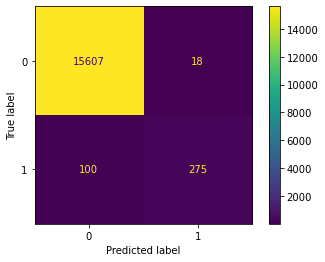

In [18]:
#assign to X_test & X_train to no modify x_test_new & x_train_new -> we will need for next section
X_test = x_test_new   
X_train = x_train_new

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the random forest classifier
'''
random_stateint, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).

n_estimatorsint, default=100
The number of trees in the forest.
'''
clf = RandomForestClassifier(n_estimators=100, random_state=50)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


predict_proba(X)
Probability estimates.

The returned estimates for all classes are ordered by the label of classes.

For a multi_class problem, if multi_class is set to be “multinomial” the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest approach, i.e calculate the probability of each class assuming it to be positive using the logistic function. and normalize these values across all the classes.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.73      0.82       375

    accuracy                           0.99     16000
   macro avg       0.97      0.87      0.91     16000
weighted avg       0.99      0.99      0.99     16000

ROC AUC Score: 0.9920309760000001


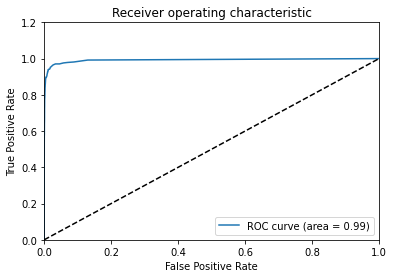

Misclassification Rate: 0.00737500000000002
OOB Error Estimate: 0.006199999999999983


In [19]:
# Calculate the classification report
cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('ROC AUC Score:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_test, y_pred)
print('Misclassification Rate:', misclassification_rate)

# Calculate the out-of-bag (OOB) error estimate
clf_oob = RandomForestClassifier(n_estimators=100, random_state=50, oob_score=True)
clf_oob.fit(X_train, y_train)
print('OOB Error Estimate:', 1 - clf_oob.oob_score_)

### (d) Research class imbalance in random forest

class imbalance can lead to poor performance in terms of accuracy, recall, and other performance metrics. 

Approaches: 

A) Resampling techniques: One common approach is to use resampling techniques to balance the class distribution in the training data. This can be achieved by oversampling the minority class or undersampling the majority class. Random forests can be trained on the resampled data to improve the performance on the minority class.

B) Weighted Random Forests: In this approach, each decision tree in the random forest is trained on a weighted version of the training data. The weights are assigned to each instance in the training data based on their class distribution. The instances of the minority class are given higher weights so that they are more likely to be selected in the training of decision trees.

C) Cost-sensitive learning: This technique involves assigning different misclassification costs to different classes. The misclassification cost for the minority class is generally set higher than the majority class, making it more costly to misclassify instances from the minority class. The random forest can then be trained with these misclassification costs to minimize the overall cost.

D) Ensemble techniques: Another approach is to use ensemble techniques to combine multiple models, each trained on a different subset of the data. This can help reduce the impact of class imbalance by reducing the variance of the individual models.

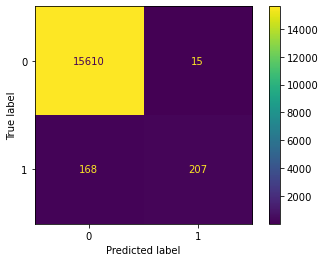

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=50, class_weight='balanced')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.93      0.55      0.69       375

    accuracy                           0.99     16000
   macro avg       0.96      0.78      0.84     16000
weighted avg       0.99      0.99      0.99     16000

ROC AUC Score: 0.99302272


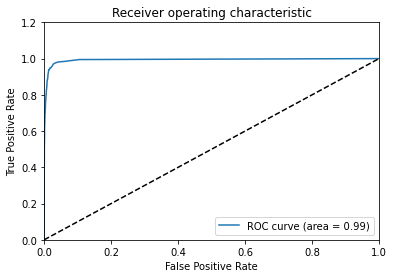

Misclassification Rate: 0.01143749999999999
OOB Error Estimate: 0.0076666666666667105


In [21]:
# Calculate the classification report
cr = classification_report(y_test, y_pred)
print('Classification Report:')
print(cr)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('ROC AUC Score:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the misclassification rate
misclassification_rate = 1 - accuracy_score(y_test, y_pred)
print('Misclassification Rate:', misclassification_rate)

# Calculate the out-of-bag (OOB) error estimate
clf_oob = RandomForestClassifier(n_estimators=100, random_state=50, oob_score=True, class_weight='balanced')
clf_oob.fit(X_train, y_train)
print('OOB Error Estimate:', 1 - clf_oob.oob_score_)

I used class_weight='balanced' approach and see an improvment from last section but it is small. It showed there is more room for improvement. I noticed first by seeing ConfusionMatrix

### (e) XGBoost and Model Trees

Training Data:

In [22]:
#assign to X_test & X_train to no modify x_test_new & x_train_new -> we will need for next section
X_test = x_test_new   
X_train = x_train_new

alpha_params_dic = {"alpha": [0, 0.001, 0.01, 0.1, 1, 10, 100]}

xgboost_classifier = XGBClassifier(objective='binary:logistic')
xgboost_classifier_gridSearchCV = GridSearchCV(xgboost_classifier, alpha_params_dic, cv=5)
xgboost_classifier_gridSearchCV = xgboost_classifier_gridSearchCV.fit(X_train, y_train)


In [23]:
print("Best α value:", xgboost_classifier_gridSearchCV.best_params_["alpha"])

# Train the final XGBoost model using the optimal α value and the resampled training set
xgboost_classifier_gridSearchCV_final = XGBClassifier(objective="binary:logistic", alpha=xgboost_classifier_gridSearchCV.best_params_["alpha"])
xgboost_classifier_gridSearchCV_final.fit(X_train, y_train)
y_train_pred = xgboost_classifier_gridSearchCV_final.predict(X_train)


Best α value: 0


In [24]:
mse = mean_squared_error(y_train, y_train_pred)
print("MSE:", mse)
print("accuracy_score:", accuracy_score(y_train, y_train_pred))

MSE: 1.6666666666666667e-05
accuracy_score: 0.9999833333333333


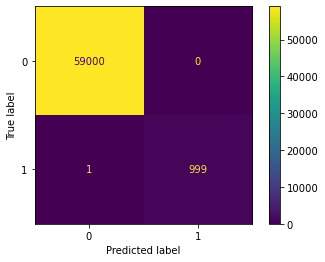

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

roc_auc_score: 0.9999998983050847
Second approach, AUC: 0.9999998983050847


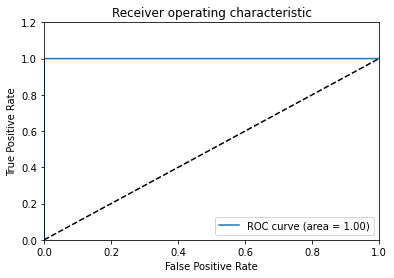

In [26]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, xgboost_classifier_gridSearchCV_final.predict_proba(X_train)[:,1])
roc_auc = roc_auc_score(y_train, xgboost_classifier_gridSearchCV_final.predict_proba(X_train)[:,1])
print('roc_auc_score:', roc_auc)

#another approach 
AUC = metrics.auc(fpr, tpr)
print('Second approach, AUC:', AUC)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Testing Data

MSE: 0.006
accuracy_score: 0.994


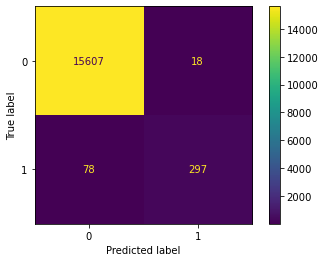

In [27]:
#assign to X_test & X_train to no modify x_test_new & x_train_new -> we will need for next section
X_test = x_test_new   

y_test_pred = xgboost_classifier_gridSearchCV_final.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
print("MSE:", mse)
print("accuracy_score:", accuracy_score(y_test, y_test_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


roc_auc_score: 0.9947921066666667
Second approach, AUC: 0.9947921066666667


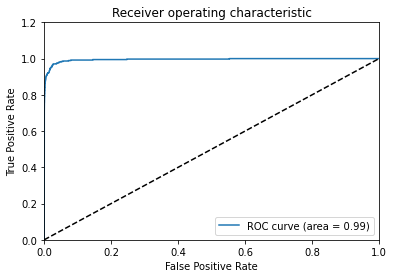

In [28]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, xgboost_classifier_gridSearchCV_final.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, xgboost_classifier_gridSearchCV_final.predict_proba(X_test)[:,1])
print('roc_auc_score:', roc_auc)

#another approach 
AUC = metrics.auc(fpr, tpr)
print('Second approach, AUC:', AUC)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### (f) Use SMOTE to pre-process your data

Training Data

In [29]:
#alpha [default=0, alias: reg_alpha]
#L1 regularization term on weights. Increasing this value will make model more conservative.
#range: [0, infinity]

pipeline = imbpipeline(steps = [['smote', SMOTE()],
                                ['classifier', XGBClassifier(objective='binary:logistic', reg_alpha=[0.001, 0.01, 0.1, 1.0, 10])]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=11)
    
param_grid = {'classifier__reg_alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=..

MSE: 1.6666666666666667e-05
accuracy_score: 0.9999833333333333


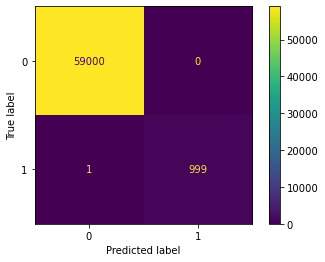

In [30]:
y_train_pred = grid_search.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print("MSE:", mse)
print("accuracy_score:", accuracy_score(y_train, y_train_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

roc_auc_score: 0.9999988813559322
Second approach, AUC: 0.9999988813559322


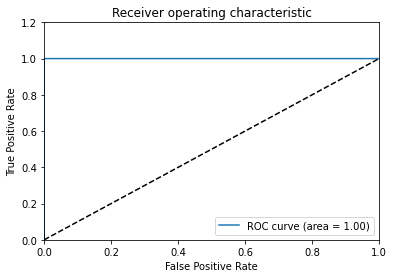

In [31]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, grid_search.predict_proba(X_train)[:,1])
roc_auc = roc_auc_score(y_train, grid_search.predict_proba(X_train)[:,1])
print('roc_auc_score:', roc_auc)

#another approach 
AUC = metrics.auc(fpr, tpr)
print('Second approach, AUC:', AUC)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Testing Data

MSE: 0.0183125
accuracy_score: 0.9816875


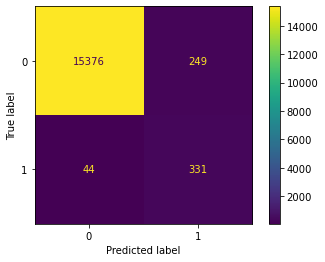

In [32]:
y_test_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("MSE:", mse)
print("accuracy_score:", accuracy_score(y_test, y_test_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

roc_auc_score: 0.9890897919999999
Second approach, AUC: 0.9890897919999999


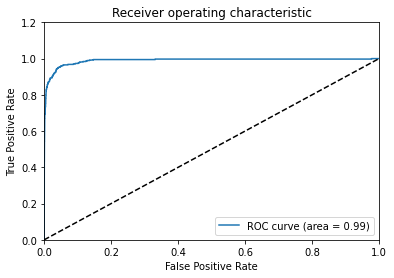

In [33]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1])
print('roc_auc_score:', roc_auc)

#another approach 
AUC = metrics.auc(fpr, tpr)
print('Second approach, AUC:', AUC)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Compare the uncompensated case with SMOTE case:
After comparing both results definetly SMOTE is prefered approach in my opinion. However, the improvement on this dataset is  small that hard to notice.

## 2. ISLR 6.6.3

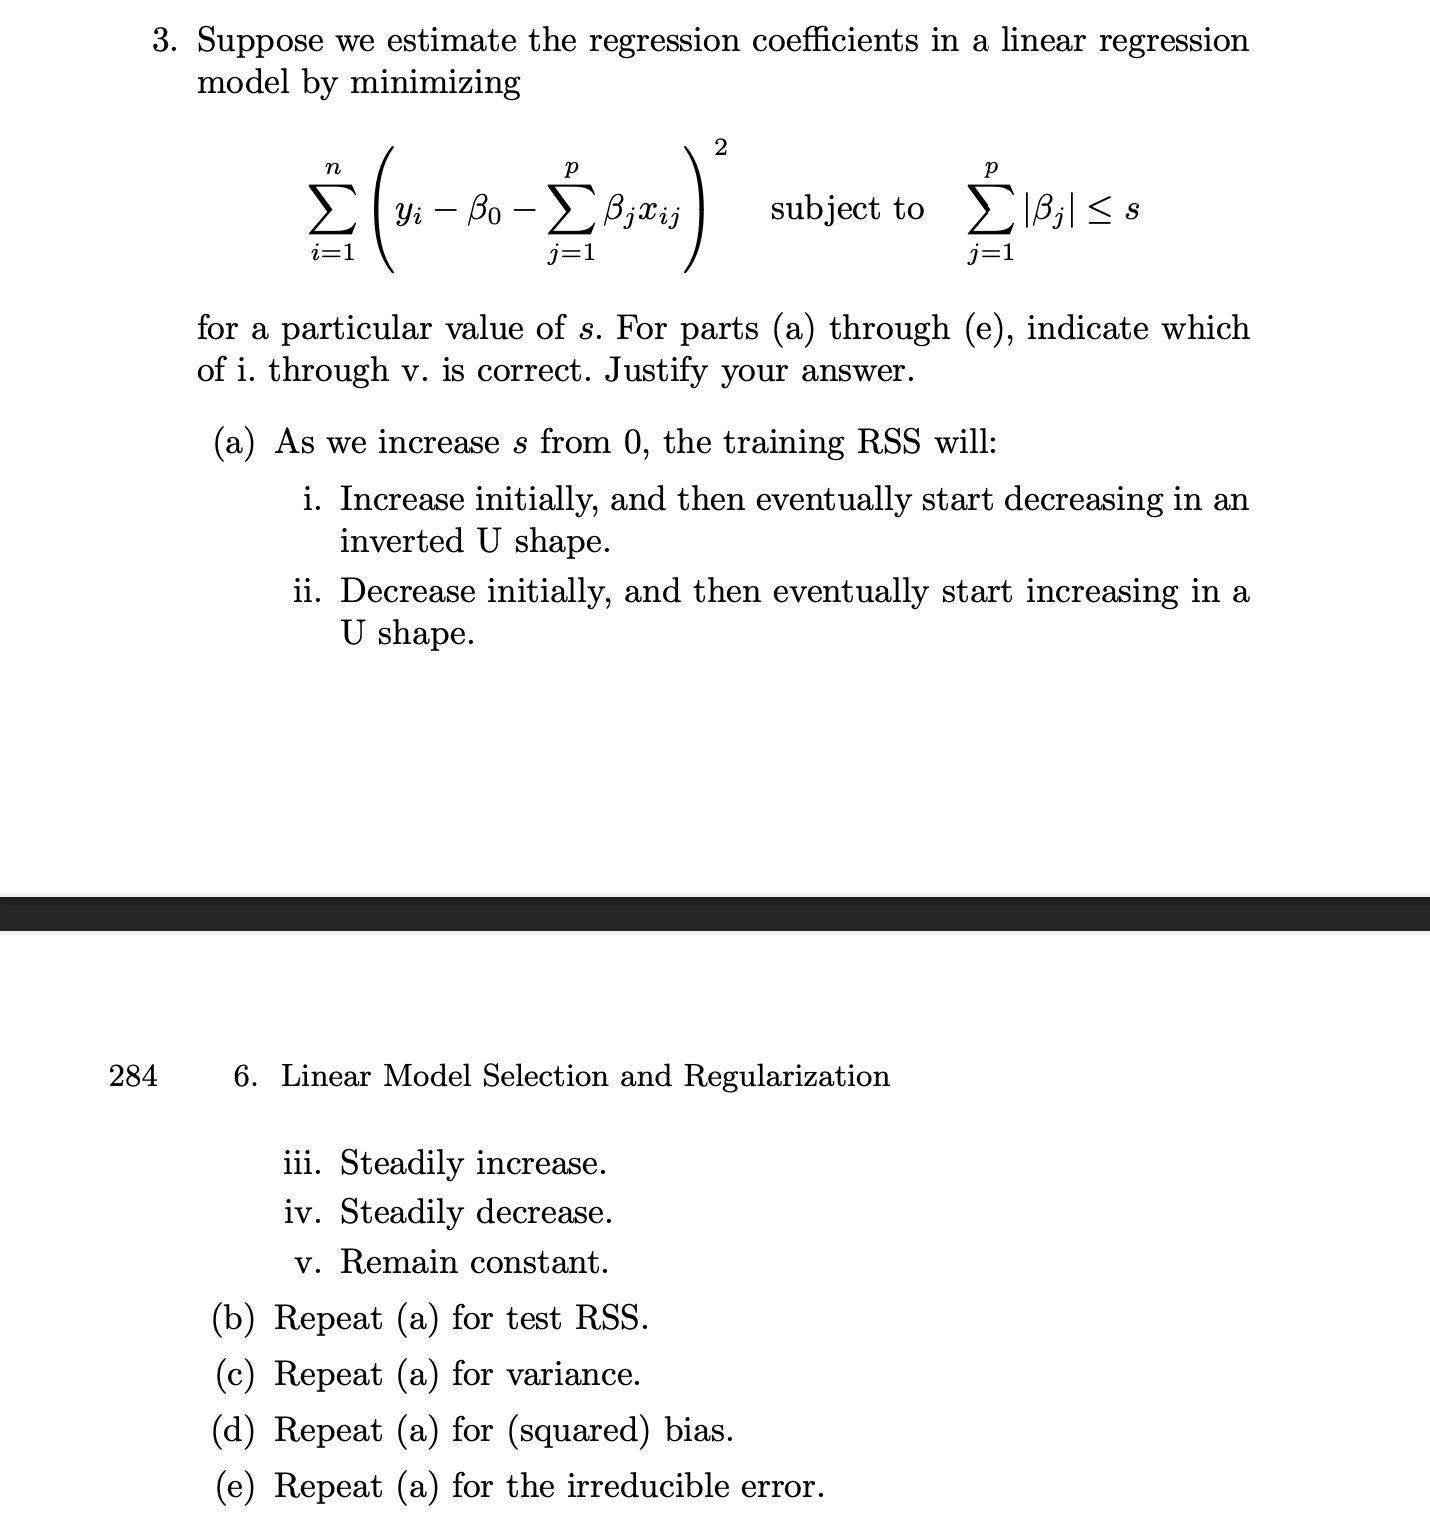

Note: In the LASSO regression problem, the constraint on the sum of absolute values of the regression coefficients is often denoted by "s" and is called the regularization parameter or tuning parameter. The value of "s" determines the amount of regularization applied to the regression problem. A larger value of "s" corresponds to a more highly regularized solution, with more coefficients set to zero, while a smaller value of "s" corresponds to a less regularized solution, with more non-zero coefficients.

As we increase s, from 0, the training RSS will:

Steadily decrease. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady decrease in the training RSS.

Repeat (a) for test RSS:

Decrease initially, and then eventually start increasing in a U shape. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes at first a decrease in the test RSS before increasing again after that in a typical U shape.

Repeat (a) for variance:

Steadily increase. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady increase in variance.

Repeat (a) for (squared) biae:

Steadily decrease. As we increase s from 0, we are restricting the βj
 coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady decrease in bias.

Repeat (a) for the irreducible error:

Remain constant. By definition, the irreducible error is independant of the model, and consequently independant of the value of s.

## 3. ISLR 6.6.5

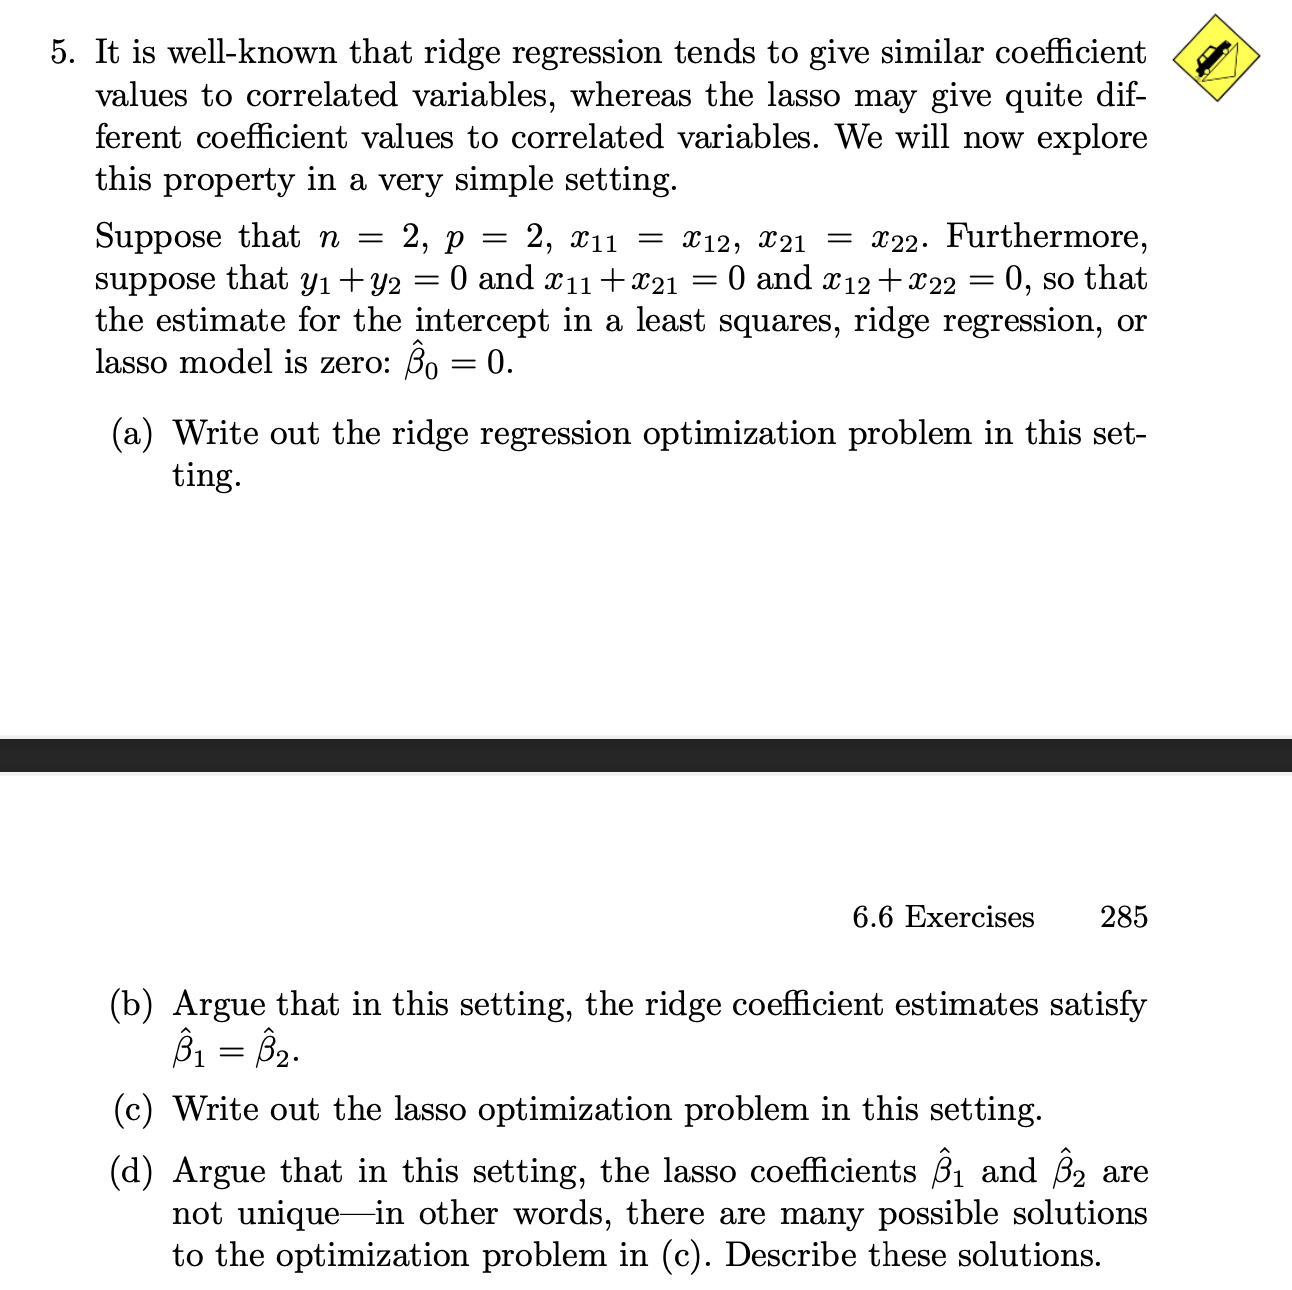

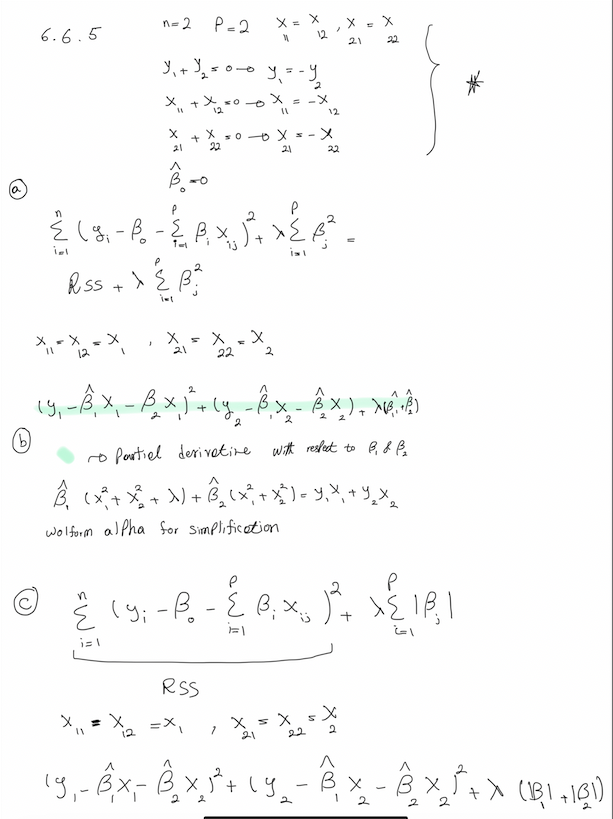

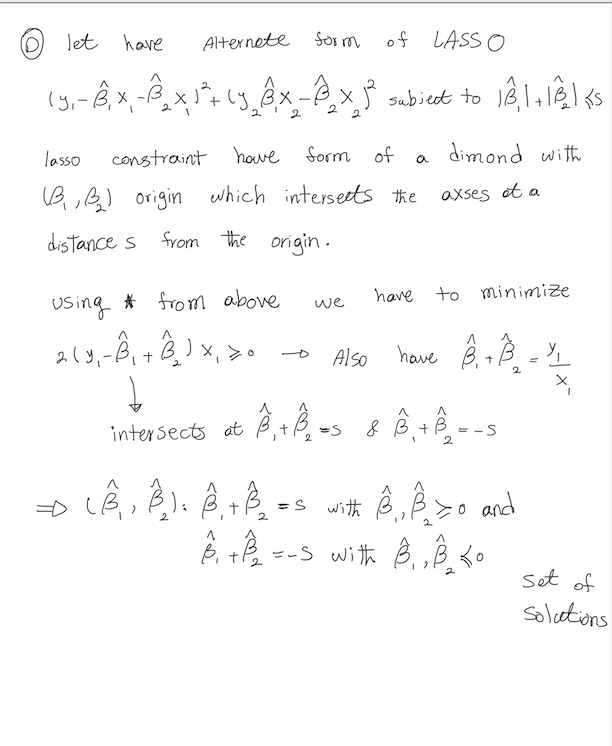

## 4. ISLR 8.4.5

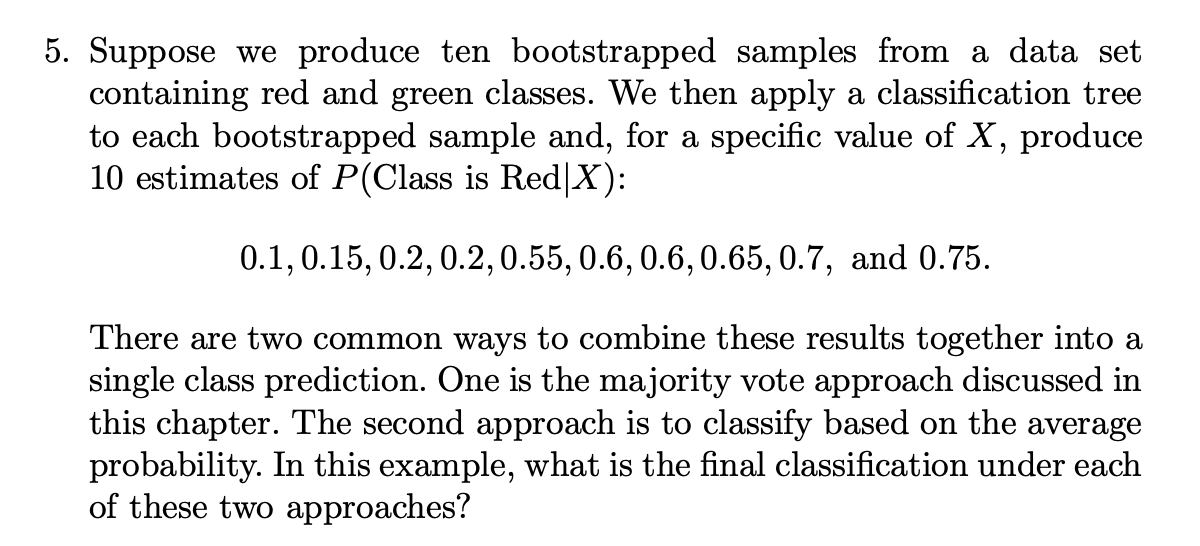

Majority approach:

sum(p >= 0.5) > sum(p < 0.5)  => select red 

Average approach:

mean of probs = 0.45 < 50% => Green



## 5. ISLR 9.7.3

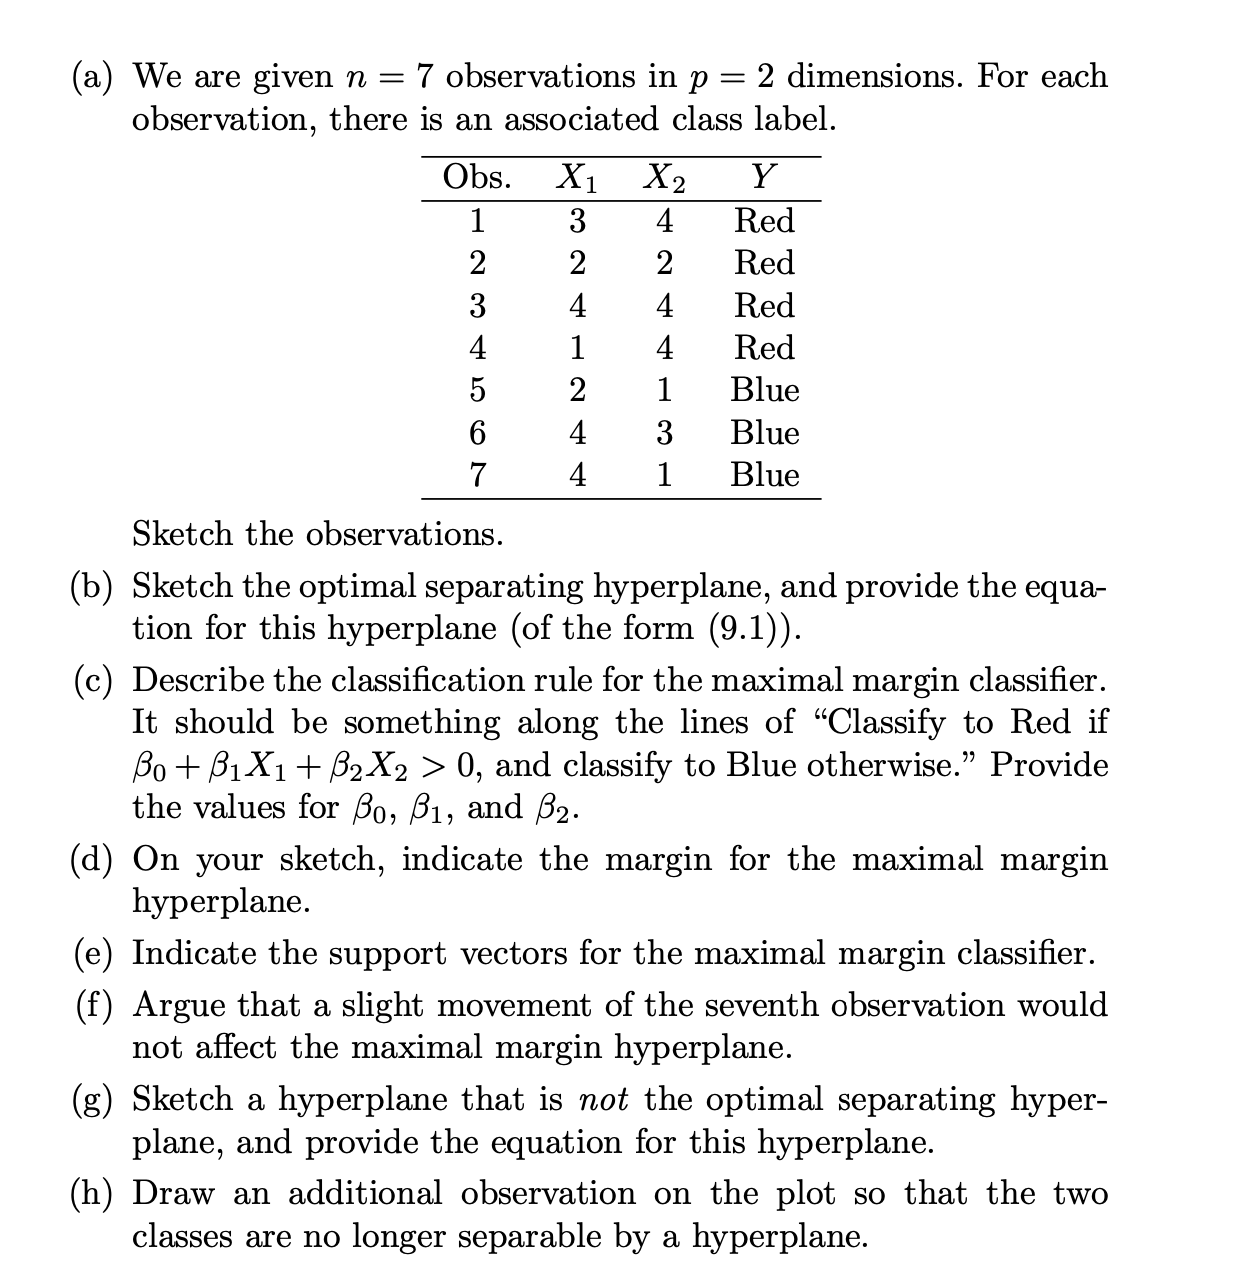

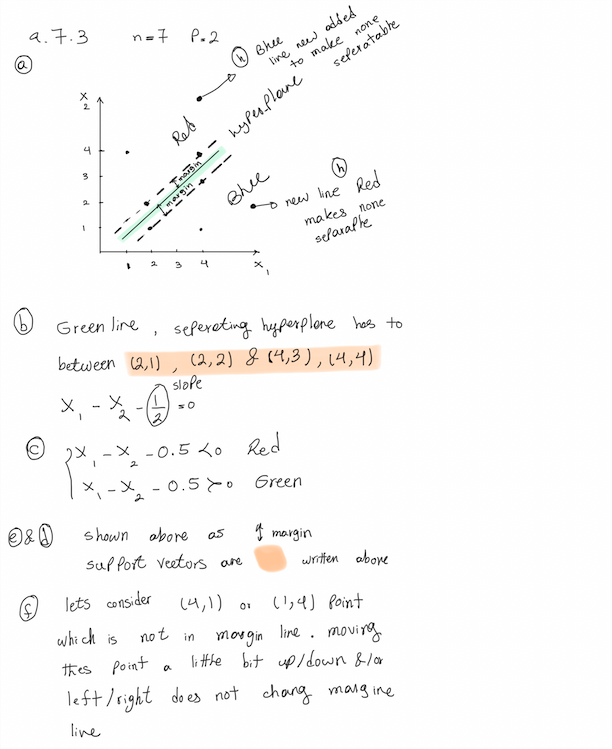

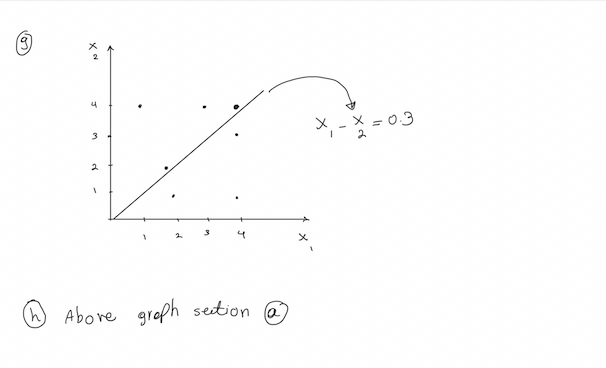